In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path= '/content/drive/MyDrive/Training'

In [6]:
ls

drive/  sample_data/


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 320 files for training.


In [108]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 120 files for validation.


In [109]:
class_names = train_ds.class_names
print(class_names)

AttributeError: ignored

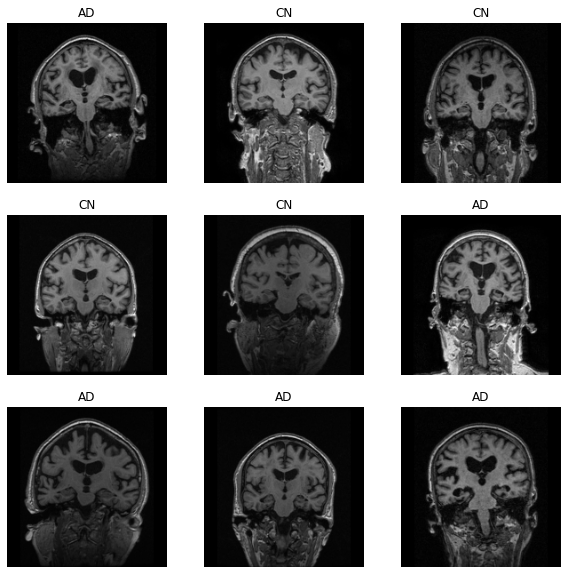

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [111]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [112]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [113]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [114]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.816363


In [115]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [116]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_17 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 22, 22, 64)      

In [118]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 7s 718ms/step - loss: 1.0599 - accuracy: 0.3549 - val_loss: 0.7159 - val_accuracy: 0.5250
Epoch 2/10
10/10 [==============================] - 0s 30ms/step - loss: 0.6862 - accuracy: 0.5727 - val_loss: 0.7663 - val_accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 24ms/step - loss: 0.6882 - accuracy: 0.5637 - val_loss: 0.6612 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 0s 24ms/step - loss: 0.6095 - accuracy: 0.6661 - val_loss: 0.6294 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 24ms/step - loss: 0.5134 - accuracy: 0.7888 - val_loss: 0.6979 - val_accuracy: 0.5667
Epoch 6/10
10/10 [==============================] - 0s 24ms/step - loss: 0.4909 - accuracy: 0.7413 - val_loss: 0.5642 - val_accuracy: 0.7167
Epoch 7/10
10/10 [==============================] - 0s 23ms/step - loss: 0.3580 - accuracy: 0.9095 - val_loss: 0.5357 - val_accuracy: 0.7333
Epoch 8/10
1

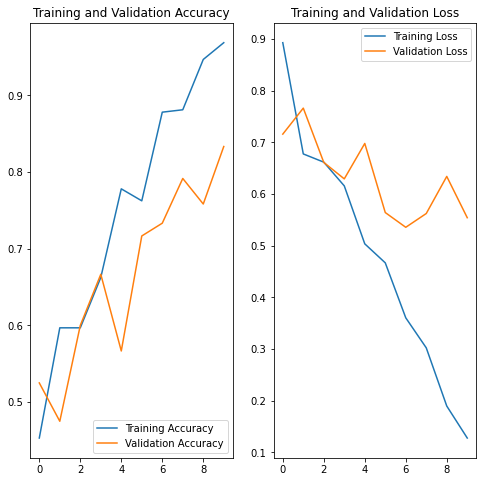

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()